## Task3: Number Recognition using MNIST dataset

## Handwritten digit recognition system

## Importing dependencies

In [2]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import accuracy_score

In [3]:
(X_train,y_train), (X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

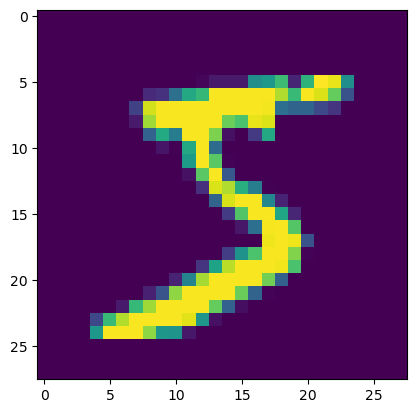

In [10]:
plt.imshow(X_train[0])

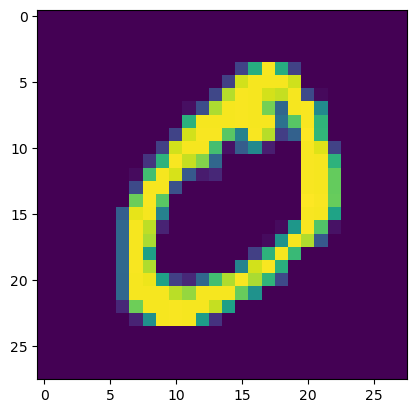

In [11]:
plt.imshow(X_train[1])

In [12]:
X_train=X_train/255
X_test=X_test/255

In [13]:
X_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Neural network architecture

In [14]:
model=Sequential()

In [15]:
model.add(Flatten(input_shape=(28,28)))

In [16]:
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the model

In [18]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

## Train the model and store the history 

In [19]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2905 - accuracy: 0.9169 - val_loss: 0.1509 - val_accuracy: 0.9564
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1305 - accuracy: 0.9617 - val_loss: 0.1146 - val_accuracy: 0.9668
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0910 - accuracy: 0.9737 - val_loss: 0.0964 - val_accuracy: 0.9703
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0671 - accuracy: 0.9798 - val_loss: 0.0902 - val_accuracy: 0.9722
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0525 - accuracy: 0.9842 - val_loss: 0.0927 - val_accuracy: 0.9721
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0411 - accuracy: 0.9875 - val_loss: 0.0951 - val_accuracy: 0.9721
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0323 - accuracy: 0.9901 - val_loss: 0.0937 - val_accuracy:

## Prediction of value

In [20]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [21]:
y_prob

array([[5.28239778e-13, 7.06308945e-17, 2.51794141e-10, ...,
        1.00000000e+00, 3.23081015e-12, 1.95368832e-09],
       [3.05495709e-18, 8.87994474e-07, 9.99999166e-01, ...,
        1.12351809e-24, 1.03106985e-11, 1.34688849e-23],
       [1.98865438e-10, 9.99999523e-01, 5.45918333e-08, ...,
        5.81083803e-08, 4.57966223e-07, 5.48106421e-11],
       ...,
       [1.03832584e-25, 3.59275378e-19, 1.81648720e-19, ...,
        1.10046072e-09, 3.31497980e-12, 5.85186581e-06],
       [9.60066106e-25, 7.89940509e-23, 4.53406236e-25, ...,
        3.37603944e-19, 4.57385432e-13, 7.17838160e-21],
       [6.83891258e-18, 6.58082137e-29, 4.71762558e-19, ...,
        2.33485899e-27, 1.63742795e-21, 4.09645173e-24]], dtype=float32)

In [22]:
y_pred = y_prob.argmax(axis=1)

In [23]:
accuracy_score(y_test,y_pred)

0.9726

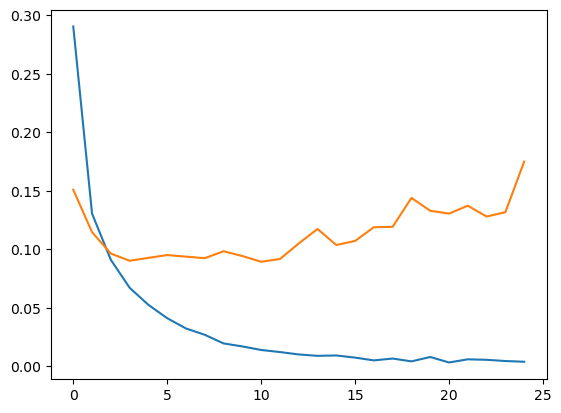

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

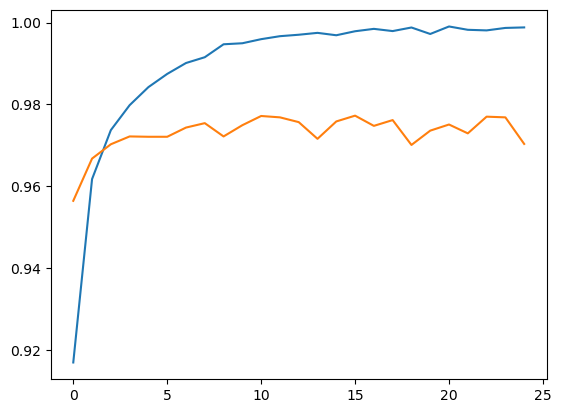

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

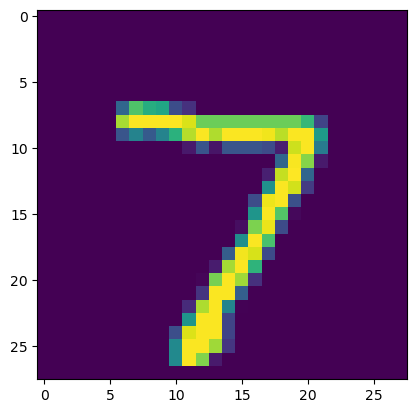

In [26]:
plt.imshow(X_test[0])

In [27]:
model.predict(X_test[0].reshape(1,28,28))

1/1 [==============================] - 0s 31ms/step


array([[5.2824178e-13, 7.0630352e-17, 2.5179461e-10, 4.2721662e-09,
        3.2406977e-23, 1.3527593e-16, 7.1476266e-25, 1.0000000e+00,
        3.2308041e-12, 1.9536956e-09]], dtype=float32)

In [28]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 26ms/step


array([7], dtype=int64)

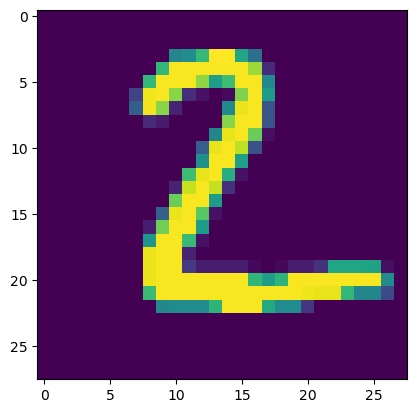

In [29]:
plt.imshow(X_test[1])

In [30]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 16ms/step


array([2], dtype=int64)